In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [3]:
df_train = pd.read_csv("src/data/train.csv") 
df_test = pd.read_csv("src/data/test.csv")

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14095 entries, 0 to 14094
Data columns (total 54 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   14095 non-null  object 
 1   COMPONENT_ARBITRARY  14095 non-null  object 
 2   ANONYMOUS_1          14095 non-null  int64  
 3   YEAR                 14095 non-null  int64  
 4   SAMPLE_TRANSFER_DAY  14095 non-null  int64  
 5   ANONYMOUS_2          14095 non-null  int64  
 6   AG                   14095 non-null  int64  
 7   AL                   14095 non-null  int64  
 8   B                    14095 non-null  int64  
 9   BA                   14095 non-null  int64  
 10  BE                   14095 non-null  int64  
 11  CA                   14095 non-null  int64  
 12  CD                   12701 non-null  float64
 13  CO                   14095 non-null  int64  
 14  CR                   14095 non-null  int64  
 15  CU                   14095 non-null 

In [5]:
df_train.isnull().sum()

ID                         0
COMPONENT_ARBITRARY        0
ANONYMOUS_1                0
YEAR                       0
SAMPLE_TRANSFER_DAY        0
ANONYMOUS_2                0
AG                         0
AL                         0
B                          0
BA                         0
BE                         0
CA                         0
CD                      1394
CO                         0
CR                         0
CU                         0
FH2O                   10205
FNOX                   10205
FOPTIMETHGLY           10205
FOXID                  10205
FSO4                   10205
FTBN                   10205
FE                         0
FUEL                   10205
H2O                        0
K                       2299
LI                         0
MG                         0
MN                         0
MO                         0
NA                         0
NI                         0
P                          0
PB                         0
PQINDEX       

In [14]:
drop_feature = ['CD', 'FH20', 'FNOX', 'FOPTIMETHGLY', 'FOXID', 'FS04', 'FUEL', 'V100']

for col in drop_feature:
  df_train = df_train.drop(['CD'])

KeyError: "['CD'] not found in axis"

In [3]:
df_train.fillna(0, inplace = True)



In [4]:
df_train.isnull().sum()

ID                     0
COMPONENT_ARBITRARY    0
ANONYMOUS_1            0
YEAR                   0
SAMPLE_TRANSFER_DAY    0
ANONYMOUS_2            0
AG                     0
AL                     0
B                      0
BA                     0
BE                     0
CA                     0
CD                     0
CO                     0
CR                     0
CU                     0
FH2O                   0
FNOX                   0
FOPTIMETHGLY           0
FOXID                  0
FSO4                   0
FTBN                   0
FE                     0
FUEL                   0
H2O                    0
K                      0
LI                     0
MG                     0
MN                     0
MO                     0
NA                     0
NI                     0
P                      0
PB                     0
PQINDEX                0
S                      0
SB                     0
SI                     0
SN                     0
SOOTPERCENTAGE         0


In [6]:
df_train.head()

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,...,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
0,TRAIN_00000,COMPONENT3,1486,2011,7,200,0,3,93,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,154.0,75,0
1,TRAIN_00001,COMPONENT2,1350,2021,51,375,0,2,19,0,...,2.0,4.0,6.0,216.0,1454.0,0,0.0,44.0,652,0
2,TRAIN_00002,COMPONENT2,2415,2015,2,200,0,110,1,1,...,0.0,3.0,39.0,11261.0,41081.0,0,0.0,72.6,412,1
3,TRAIN_00003,COMPONENT3,7389,2010,2,200,0,8,3,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,133.3,7,0
4,TRAIN_00004,COMPONENT3,3954,2015,4,200,0,1,157,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,133.1,128,0


In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [6]:
x = df_train.drop(['ID', 'Y_LABEL'], axis=1)
y = df_train['Y_LABEL']

In [7]:
scalar = StandardScaler()
le = LabelEncoder()

def get_values(value):
  return value.values.reshape(-1, 1)

categorical_features = ['COMPONENT_ARBITRARY','YEAR']

for col in x:
  if col not in categorical_features:
    x[col] = scalar.fit_transform(get_values(x[col]))

for col in categorical_features:
  x[col] = le.fit_transform(x[col])


In [25]:
pca = PCA()

x_new = pca.fit_transform(x)
x_new

array([[-2.98153652e+00, -2.89018582e+00,  3.75097887e+00, ...,
         1.80213485e-03, -8.53334038e-03, -1.39164975e-02],
       [ 7.35849357e+00, -9.21624004e-01, -7.14897378e-01, ...,
         5.02627057e-02, -3.14607320e-02,  3.42514894e-02],
       [ 1.46613822e+00, -1.14586748e+00, -1.50863217e+00, ...,
         3.53490444e-02, -1.48072835e-02,  1.05129768e-02],
       ...,
       [-5.60775377e+00, -1.01272521e+00, -5.03689326e-01, ...,
         5.39808710e-02,  3.43300451e-02,  1.68114448e-02],
       [-4.50112039e+00, -8.55564169e-01, -1.50887794e+00, ...,
         4.99864259e-02,  7.05898013e-03,  1.24650631e-02],
       [-1.03345069e+00, -5.50896728e+00, -2.28010069e+01, ...,
        -1.95258349e-01,  3.17263683e-02, -7.66366994e-02]])

<AxesSubplot:>

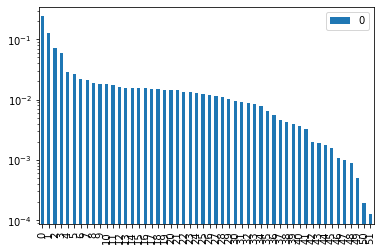

In [28]:
pc_ratio = pca.explained_variance_ratio_
pc_ratio_df = pd.DataFrame(pc_ratio)
pc_ratio_df.plot(kind='bar', logy = True)

In [31]:
pc_ratio_df

,0
0,0.239095
1,0.125388
2,0.072378
3,0.058389
4,0.028384
5,0.026959
6,0.021824
7,0.021174
8,0.018807
9,0.018216


In [39]:
x_train, x_valid, y_train, y_valid = train_test_split(x,y, test_size=0.2, random_state=0)

pca.fit(x_train)
train_score = pca.transform(x_train)
test_score = pca.transform(x_valid)

In [48]:
clf = LogisticRegression(max_iter=2000, random_state=0,solver='sag')
clf2 = LogisticRegression(max_iter=2000, random_state=0,solver='sag')

clf.fit(x_train, y_train)
pred = clf.predict(x_valid)
print(accuracy_score(y_valid, pred))

clf2.fit(train_score[:,:7], y_train)
pred2 = clf2.predict(test_score[:,:7])
print(accuracy_score(y_valid, pred2))


0.9510464703795672
0.9180560482440582


In [9]:
x_train, x_valid, y_train, y_valid = train_test_split(x,y, test_size=0.2, random_state=0)

clf = LogisticRegression(max_iter=2000, random_state=0,solver='sag')
clf.fit(x_train, y_train)
pred = clf.predict(x_valid)
print(accuracy_score(y_valid, pred))

0.9510464703795672


In [11]:
pro = pd.DataFrame(clf.predict_proba(x_valid))
pro

,0,1
0,0.972230,0.027770
1,0.948833,0.051167
2,0.985480,0.014520
3,0.909817,0.090183
4,0.947236,0.052764
...,...,...
2814,0.977441,0.022559
2815,0.894119,0.105881
2816,0.957162,0.042838
2817,0.968745,0.031255


In [23]:
pro.iloc[:, 1:2]

,1
0,0.027770
1,0.051167
2,0.014520
3,0.090183
4,0.052764
...,...
2814,0.022559
2815,0.105881
2816,0.042838
2817,0.031255


In [ ]:
## 회귀를 돌릴때 선후관계
##